[0.0011999999999999927, 0.0011999999999999927, 0.0011999999999999927, 0.0011999999999999927, 0.0012000000000000066, 0.0012000000000000066, 0.0012000000000000066, 0.0012000000000000066, 0.0011999999999999997, 0.0011999999999999997, 0.0011999999999999927, 0.0011999999999999927, 0.0012000000000000066, 0.0012000000000000066, 0.0011999999999999962, 0.0011999999999999962, 0.0012000000000000014, 0.0012000000000000014, 0.0012000000000000014, 0.0012000000000000014, 0.0011999999999999927, 0.0011999999999999927, 0.0012000000000000066, 0.0012000000000000066, 0.0011999999999999927, 0.0011999999999999927, 0.0012000000000000066, 0.0012000000000000066, 0.0011999999999999997, 0.0011999999999999997, 0.0011999999999999997, 0.0011999999999999997, 0.0011999999999999997, 0.0011999999999999997, 0.0011999999999999997, 0.0011999999999999997, 0.0011999999999999997, 0.0011999999999999997, 0.0011999999999999997, 0.0011999999999999997, 0.0012000000000000066, 0.0012000000000000066, 0.0012000000000000066, 0.00120000

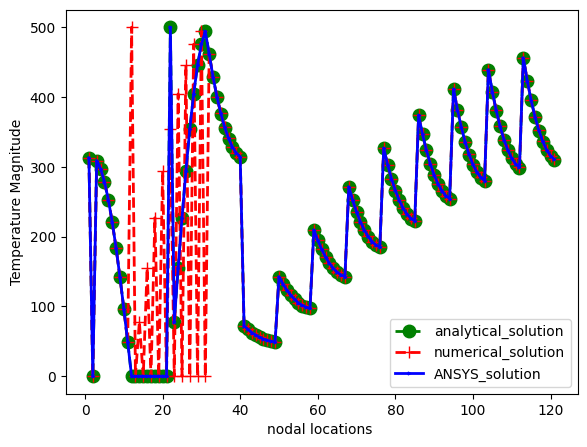

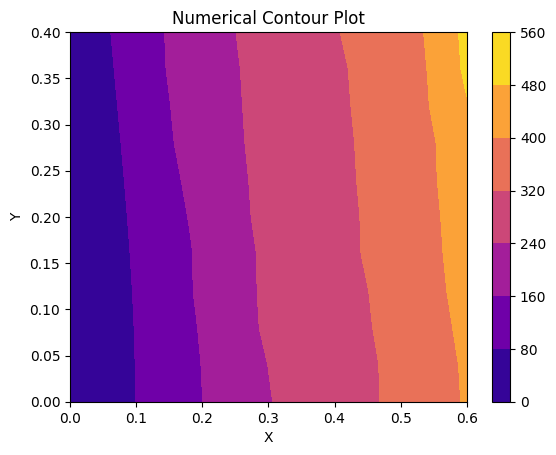

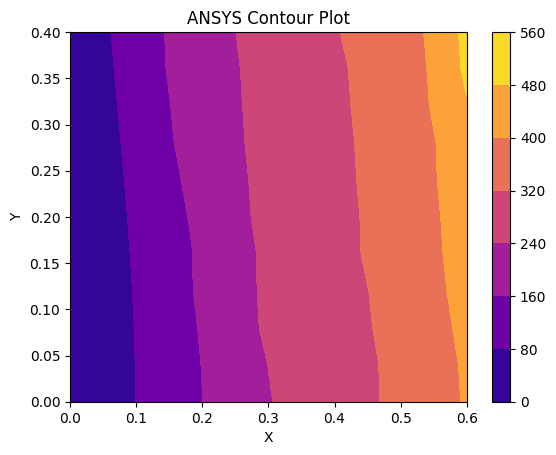

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
elements_finer = np.loadtxt('ELIS-A3')

elements_finer = np.delete(elements_finer, [1, 2, 3, 4, 5, -1], axis=1)

nodes_coord_finer = np.loadtxt('NLIS-A3')
nodes_coord_finer = nodes_coord_finer[:, :-4]

areas = []
B= []
for i in elements_finer:
    x = []
    y = []
    b = [[0,0,0],[0,0,0]]
    for j in range(1,4):
        x.append(nodes_coord_finer[int(i[j])-1][1])
        y.append(nodes_coord_finer[int(i[j])-1][2])
    area = 0.5*((x[1]*y[2]-x[2]*y[1]) + (x[2]*y[0]-x[0]*y[2]) + (x[0]*y[1]-x[1]*y[0]))
    areas.append(area)
    b[0][0] = y[1]-y[2]
    b[0][1] = y[2]-y[0]
    b[0][2] = y[0]-y[1]
    b[1][0] = x[2]-x[1]
    b[1][1] = x[0]-x[2]
    b[1][2] = x[1]-x[0]
    for j in range(2):
        for k in range(3):
            b[j][k] = b[j][k]/(2*area)
    B.append(b)

B[21]
C = 30*np.eye(2)
C
K_elem = []
for i in range(200):
   # print(B[i])
    mul = np.dot(np.transpose(B[i]),C)

    K_elem.append(np.dot(mul,B[i])*areas[i])

# Assembly
# Assembling Global Matrix #
NDOF_finer = 121
K_global = np.zeros((121,121))
K = np.zeros((121,121))
for i in range(200):
    for j in range(3):

        for k in range(3):
            K[int(elements_finer[i][j+1])-1][int(elements_finer[i][k+1])-1] = K_elem[i][j][k]


    K_global += K
    K = np.zeros((121,121))


Q = np.zeros((NDOF_finer,1))    # Flux Vector #
T = np.zeros((NDOF_finer,1))    # Temperature Vector #
RHS = np.zeros((NDOF_finer,1))
import math
# Applying Boundary Conditions #
# Non- Homogenous Boundary Conditions #
NHBC = [11,21,22,23,24,25,26,27,28,29,30]
for i in range(len(NHBC)):
    T[NHBC[i]] = 500 * math.cos(math.pi * nodes_coord_finer[NHBC[i]][1] / 1.2)

for i in range(len(NHBC)):
    RHS = K_global[NHBC[i]][:]
    RHS[NHBC[i]] = -1
    Q = [Q[j] - T[NHBC[i]] * RHS[j] for j in range(NDOF_finer)]

for i in range(len(NHBC)):
    Q[NHBC[i]] = T[NHBC[i]]

for i in range(len(NHBC)):
    K_global[:, NHBC[i]] = [0] * NDOF_finer
    K_global[NHBC[i], :] = [0] * NDOF_finer
    K_global[NHBC[i]][NHBC[i]] = 1
# Applying homogeneous Boundary conditions

matrix_Kg = np.array(K_global)
matrix_Qg = np.array(Q)

# Define the rows and columns to delete
rows_to_delete = [20,19,18,17,16,15,14,13,12,11,1]
columns_to_delete = [20,19,18,17,16,15,14,13,12,11,1]

KgE = np.delete(matrix_Kg, rows_to_delete, axis=0)
KgE = np.delete(KgE, columns_to_delete, axis=1)
QgE = np.delete(matrix_Qg, rows_to_delete, axis=0)




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
elements_finer = np.loadtxt('ELIS-A3')

elements_finer = np.delete(elements_finer, [1, 2, 3, 4, 5, -1], axis=1)

nodes_coord_finer = np.loadtxt('NLIS-A3')
nodes_coord_finer = nodes_coord_finer[:, :-4]

areas = []
B= []
for i in elements_finer:
    x = []
    y = []
    b = [[0,0,0],[0,0,0]]
    for j in range(1,4):
        x.append(nodes_coord_finer[int(i[j])-1][1])
        y.append(nodes_coord_finer[int(i[j])-1][2])
    area = 0.5*((x[1]*y[2]-x[2]*y[1]) + (x[2]*y[0]-x[0]*y[2]) + (x[0]*y[1]-x[1]*y[0]))
    areas.append(area)
    b[0][0] = y[1]-y[2]
    b[0][1] = y[2]-y[0]
    b[0][2] = y[0]-y[1]
    b[1][0] = x[2]-x[1]
    b[1][1] = x[0]-x[2]
    b[1][2] = x[1]-x[0]
    for j in range(2):
        for k in range(3):
            b[j][k] = b[j][k]/(2*area)
    B.append(b)
print(areas)
print(B)
B[21]
C = 30*np.eye(2)
C
K_elem = []
for i in range(200):
   # print(B[i])
    mul = np.dot(np.transpose(B[i]),C)

    K_elem.append(np.dot(mul,B[i])*areas[i])

# Assembly
# Assembling Global Matrix #
NDOF_finer = 121
K_global = np.zeros((121,121))
K = np.zeros((121,121))
for i in range(200):
    for j in range(3):

        for k in range(3):
            K[int(elements_finer[i][j+1])-1][int(elements_finer[i][k+1])-1] = K_elem[i][j][k]


    K_global += K
    K = np.zeros((121,121))


Q = np.zeros((NDOF_finer,1))    # Flux Vector #
T = np.zeros((NDOF_finer,1))    # Temperature Vector #
RHS = np.zeros((NDOF_finer,1))
import math
# Applying Boundary Conditions #
# Non- Homogenous Boundary Conditions #
NHBC = [11,21,22,23,24,25,26,27,28,29,30]
for i in range(len(NHBC)):
    T[NHBC[i]] = 500 * math.cos(math.pi * nodes_coord_finer[NHBC[i]][1] / 1.2)

for i in range(len(NHBC)):
    RHS = K_global[NHBC[i]][:]
    RHS[NHBC[i]] = -1
    Q = [Q[j] - T[NHBC[i]] * RHS[j] for j in range(NDOF_finer)]

for i in range(len(NHBC)):
    Q[NHBC[i]] = T[NHBC[i]]

for i in range(len(NHBC)):
    K_global[:, NHBC[i]] = [0] * NDOF_finer
    K_global[NHBC[i], :] = [0] * NDOF_finer
    K_global[NHBC[i]][NHBC[i]] = 1
# Applying homogeneous Boundary conditions

matrix_Kg = np.array(K_global)
matrix_Qg = np.array(Q)

# Define the rows and columns to delete
rows_to_delete = [20,19,18,17,16,15,14,13,12,11,1]
columns_to_delete = [20,19,18,17,16,15,14,13,12,11,1]

KgE = np.delete(matrix_Kg, rows_to_delete, axis=0)
KgE = np.delete(KgE, columns_to_delete, axis=1)
QgE = np.delete(matrix_Qg, rows_to_delete, axis=0)




TE = np.linalg.solve(KgE, QgE)

##plotting
x = []
y = []
for i in range(len(nodes_coord_finer)):
    x.append(nodes_coord_finer[i][1])
    y.append(nodes_coord_finer[i][2])
T = []
for i in range(len(nodes_coord_finer)):
    T.append(156.22*math.cos(math.pi*x[i]/1.2)*(math.e**(math.pi*y[i]/1.2) + math.e**(-1*math.pi*y[i]/1.2)))

TA = np.loadtxt('PRNSOL_finer')
TA = TA[:, 1]
#print(TE[0])
for i in rows_to_delete:
    TE = np.insert(TE,i,[0])

result = np.column_stack((nodes_coord_finer, TE))
sorted_array = np.sort(result, axis=0)
data = sorted_array[:,-1]
len(data)
reshaped_array = data[:121].reshape(11, 11)
reshaped_array = reshaped_array.T
reshaped_array
result_ansys = np.column_stack((nodes_coord_finer, TA))
result_ansys
sorted_array_ANSYS = np.sort(result_ansys, axis=0)
data_ANSYS = sorted_array_ANSYS[:,-1]
reshaped_array_ansys = data_ANSYS[:121].reshape(11, 11)
reshaped_array_ansys = reshaped_array_ansys.T
X = range(1,122)

y1 = T
y2 = TE
y3 = TA
#print(y1,y2,y3)
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(X,y1,color="green",lw=2,ls="--",marker='o',markersize=9,label='analytical_solution')
axes.plot(X,y2,color="red",lw=2,ls="--",marker='+',markersize=8,label='numerical_solution')
axes.plot(X,y3,color="blue",lw=2,ls="-",marker='>',markersize = 2, label = 'ANSYS_solution')
plt.xlabel("nodal locations ")
plt.ylabel("Temperature Magnitude")
axes.legend()
## contour plot
import numpy as np
import matplotlib.pyplot as plt

feature_x = np.linspace(0.0, 0.6, 11)
feature_y = np.linspace(0.0, 0.4, 11)
X, Y = np.meshgrid(feature_x, feature_y)
#Z_values = np.array([318.1072831, 0.0, 275.48898829, 159.05364155, 0.0, 0.0, 500.0, 250.0, 433.01270189, 360.7255779, 180.36278895, 312.39751426])
#Z = Z_values.reshape(X.shape)
Z = reshaped_array
fig, ax = plt.subplots(1, 1)
contour = ax.contourf(X, Y, Z, cmap='plasma')
cbar = plt.colorbar(contour)
ax.set_title('Numerical Contour Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()
import numpy as np
import matplotlib.pyplot as plt

feature_x = np.linspace(0.0, 0.6, 11)
feature_y = np.linspace(0.0, 0.4, 11)
X, Y = np.meshgrid(feature_x, feature_y)
#Z_values = np.array([318.1072831, 0.0, 275.48898829, 159.05364155, 0.0, 0.0, 500.0, 250.0, 433.01270189, 360.7255779, 180.36278895, 312.39751426])
#Z = Z_values.reshape(X.shape)
Z = reshaped_array_ansys
fig, ax = plt.subplots(1, 1)
contour = ax.contourf(X, Y, Z, cmap='plasma')
cbar = plt.colorbar(contour)
ax.set_title('ANSYS Contour Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()
